In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [4]:
df=pd.read_csv('EastWestAirlines.csv')

In [5]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [11]:
norm=normalize(df)

In [13]:
norm.shape

(3999, 12)

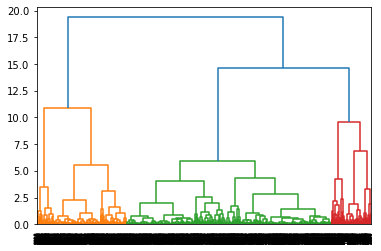

In [73]:
from matplotlib import pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(norm, method='ward'))

In [15]:
cluster = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [16]:
y_hc = cluster.fit_predict(norm)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [17]:
clusters

,Clusters
0,2
1,1
2,2
3,1
4,0
...,...
3994,2
3995,2
3996,0
3997,2


In [18]:
df2=pd.concat([df,clusters],axis=1)

In [19]:
df2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [20]:
len(df2[df2['Clusters']==1])

475

In [21]:
len(df2[df2['Clusters']==0])

1078

In [22]:
len(df2[df2['Clusters']==2])

2446

## KMEANS

In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [24]:
list1=[]
ran=range(2,15)
for i in ran:
    model=KMeans(n_clusters=i)
    model.fit(norm)
    list1.append(model.inertia_)

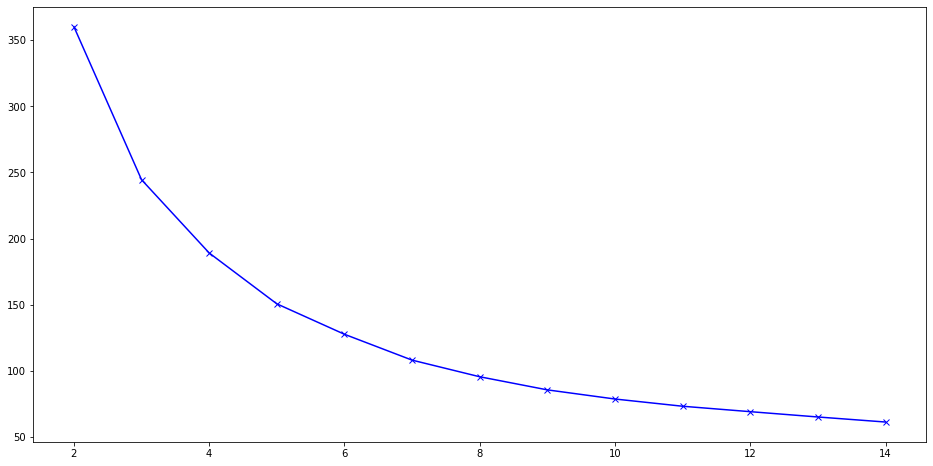

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(ran,list1,'bx-')
plt.show()

In [26]:
model1=KMeans(n_clusters=3).fit(norm)

In [27]:
val=model1.labels_
val

array([1, 1, 1, ..., 1, 1, 2])

In [28]:
clu=pd.DataFrame(val,columns=['cluster'])

In [29]:
df3=pd.concat([df,clu],axis=1)

In [30]:
df3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [31]:
len(df3[df3['cluster']==0])

793

In [32]:
len(df3[df3['cluster']==1])

2886

In [33]:
len(df3[df3['cluster']==2])

320

### DBSCAN

In [34]:
from sklearn.cluster import DBSCAN

In [65]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan.fit(norm)

DBSCAN(eps=0.4)

In [66]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
dbcluster=dbscan.labels_

In [68]:
ddf=pd.DataFrame(dbcluster,columns=['dbcluster'])

In [69]:
ddf['dbcluster'].unique()

array([ 0, -1], dtype=int64)

In [70]:
dbdf=pd.concat([df,ddf],axis=1)

In [71]:
dbdf

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
